Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

First 5 Rows of Dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1

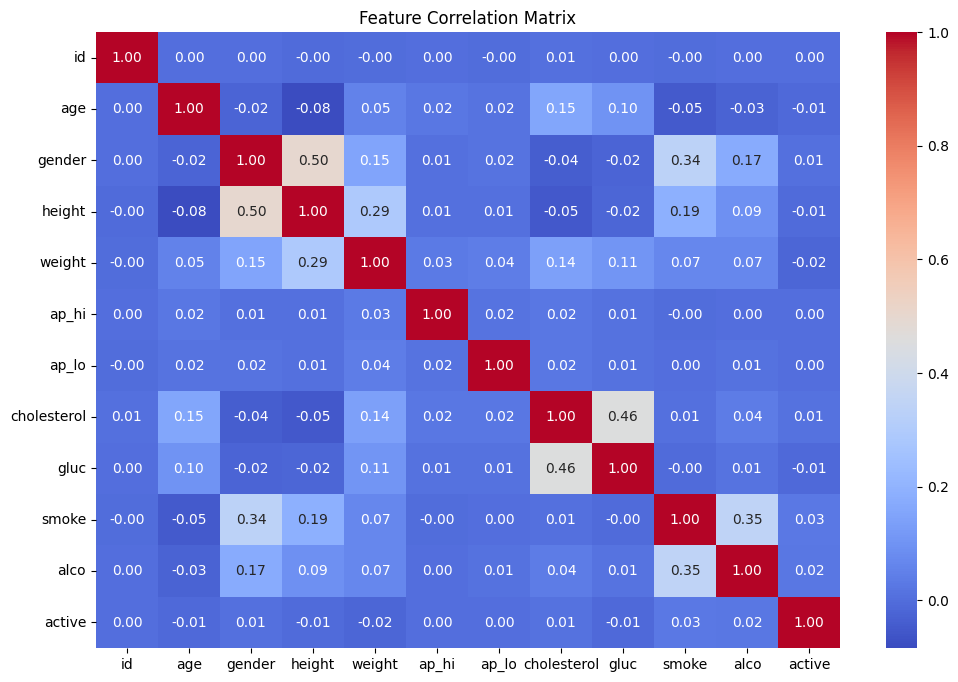


Training Logistic Regression...
Logistic Regression Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

Confusion Matrix:
 [[5362 1626]
 [2248 4764]]

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Confusion Matrix:
 [[5324 1664]
 [2118 4894]]

Training K-Nearest Neighbor...
K-Nearest Neighbor Accuracy: 0.63


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



data = pd.read_csv('/content/sample_data/cardio_train.csv', sep=';')

print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows of Dataset:")
print(data.head())


print("\nMissing Values:")
print(data.isnull().sum())


numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns


data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing Values After Handling:")
print(data.isnull().sum())


X = data.drop('cardio', axis=1)
y = data['cardio']


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(12, 8))
correlation_matrix = pd.DataFrame(X_train, columns=data.columns[:-1]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("\nModel Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()
